In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
def plot_mulitple(*series, figsize=(12, 7), legend=[]):
    fig = plt.figure(figsize=figsize)
    for element in series:
        plt.plot(element)
    plt.legend(legend)
    plt.show()

In [5]:
def chebyshev(ex, varx, prob):
    n = np.sqrt(1/prob)
    low = ex - n * np.sqrt(varx)
    high = ex + n * np.sqrt(varx)
    return low, high

In [6]:
def stats(row):
    minAn = min(row)
    maxAn = max(row)
    meanAn = np.mean(row) # Expected value
    varAn = np.var(row)
    chebLow, chebHigh = chebyshev(meanAn, varAn, 0.03)
    return minAn, maxAn, meanAn, varAn, chebLow, chebHigh

# Chebyshew
$$
    P(|X - \mu| \geq n\sigma) \leq \frac{1}{n^2}
$$
$$ \mu = EX $$
$$ \sigma^2 = VarX $$
$$
    P(|X -\mu| \geq n \sqrt{\sigma}) \leq \frac{1}{n^2} \
$$
$$
    |X - \mu| = n \sqrt{\sigma}
$$
$$
    X = \mu + n \sqrt{\sigma} \lor X = \mu - n \sqrt{\sigma}
$$

In [53]:
def analyze_csv(fname):
    df = pd.read_csv(fname, header=None)
    ns = df.iloc[:,0].tolist()
    df = df.drop(df.columns[0], 1)
    
    data = []
    for index, row in df.iterrows():
        row = row.tolist()
        row = stats(row)
        t = (1.75*(index + 1) * 100 * np.log2((index + 1) * 100),)
        data.append(row + t)

    return pd.DataFrame(data, index=ns, columns=["min(X)", "max(X)", "E[X]", "Var[X]", "chebLow", "chebHigh", "theoretical"])

In [54]:
def plot_data_frame(df):
    df = df.drop(labels='Var[X]', axis=1)
    x = df.index
    y = df.T.values
    for column, label in zip(y, df.columns):
        plt.plot(x, column, label=label)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend()
    plt.show()

In [55]:
qs = analyze_csv("qs_experiment.csv"); qs

,min(X),max(X),E[X],Var[X],chebLow,chebHigh,theoretical
100,1116,1531,1238.77,3550.13,894.77,1582.77,1162.67
200,2542,3323,2796.78,14486.96,2101.87,3491.69,2675.35
300,4083,5273,4484.13,33618.72,3425.54,5542.73,4320.13
400,5761,7264,6251.69,61548.15,4819.35,7684.03,6050.70
500,7430,9509,8082.08,92725.78,6323.99,9840.16,7845.06
...,...,...,...,...,...,...,...
9600,209007,248696,221491.64,36633387.31,186547.21,256436.06,222244.15
9700,210188,248974,223688.12,35881662.17,189104.08,258272.15,224812.98
9800,212675,250610,226422.51,37173988.97,191221.19,261623.83,227384.41
9900,216035,255963,228842.39,38488562.15,193024.07,264660.71,229958.41


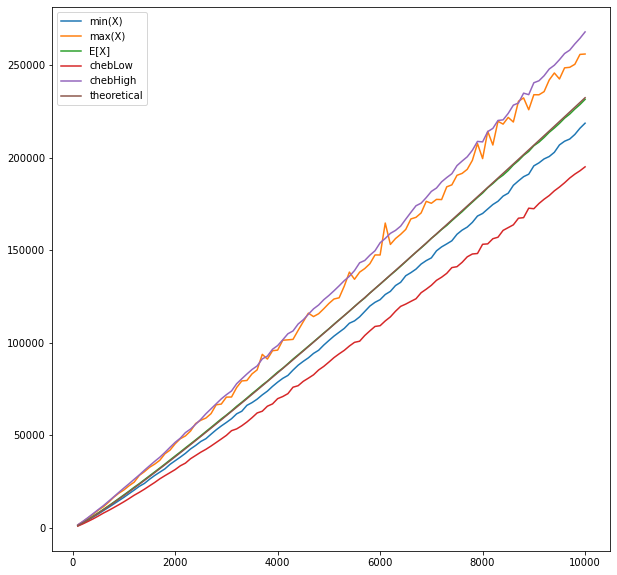

In [56]:
plot_data_frame(qs)

In [57]:
ms = analyze_csv("ms_experiment.csv"); ms

,min(X),max(X),E[X],Var[X],chebLow,chebHigh,theoretical
100,520,558,541.55,39.11,505.44,577.66,1162.67
200,1247,1305,1281.55,71.71,1232.65,1330.44,2675.35
300,2057,2130,2097.48,100.91,2039.49,2155.48,4320.13
400,2928,3000,2962.33,133.69,2895.57,3029.08,6050.70
500,3807,3888,3854.66,159.42,3781.77,3927.56,7845.06
...,...,...,...,...,...,...,...
9600,114825,115224,115054.90,3689.02,114704.23,115405.57,222244.15
9700,116222,116625,116398.76,3336.89,116065.25,116732.28,224812.98
9800,117564,117929,117753.17,3370.83,117417.97,118088.37,227384.41
9900,118893,119325,119098.70,3777.86,118743.83,119453.56,229958.41


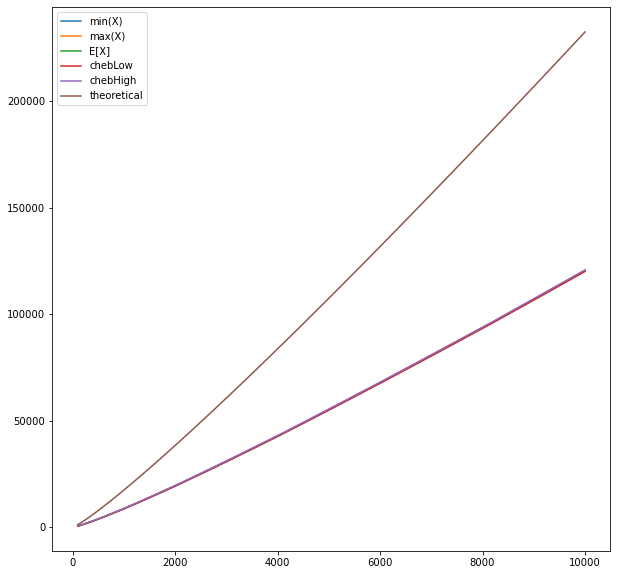

In [58]:
plot_data_frame(ms)